In [1]:
!pip install lib-0.1.0-py3-none-any.whl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import svm
from lib.utils import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lib.utils import *
from xgboost import XGBClassifier


Processing c:\users\hi\downloads\major project\lib-0.1.0-py3-none-any.whl
lib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [2]:
df = pd.read_csv('dataset.csv')
df.head()

Logical quotient rating  hackathons  coding skills rating  \
0                        4           0                     4   
1                        7           1                     2   
2                        1           4                     1   
3                        1           1                     2   
4                        5           4                     6   

   public speaking points self-learning capability? Extra-courses did  \
0                       8                       yes               yes   
1                       3                        no               yes   
2                       3                        no               yes   
3                       5                       yes                no   
4                       3                        no                no   

      certifications          workshops reading and writing skills  \
0  shell programming    cloud computing                  excellent   
1   machine learning  database security                       poor   
2    app development   web technologies                       poor   
3             python       data science                     medium   
4    app development    cloud computing                       poor   

  memory capability score    Interested subjects   interested career area   \
0               excellent        cloud computing          system developer   
1                  medium               networks  Business process analyst   
2               excellent                hacking                 developer   
3               excellent               networks                   testing   
4               excellent  Computer Architecture                   testing   

  Type of company want to settle in? Taken inputs from seniors or elders  \
0                       Web Services                                  no   
1                      SAaS services                                 yes   
2                Sales and Marketing                                 yes   
3  Testing and Maintainance Services                                  no   
4                product development                                  no   

  Interested Type of Books Management or Technical hard/smart worker  \
0             Prayer books              Management       hard worker   
1                Childrens               Technical       hard worker   
2                   Travel              Management       hard worker   
3                  Romance              Management      smart worker   
4                Cookbooks              Management       hard worker   

  worked in teams ever? Introvert              Suggested Job Role  
0                   yes        no              Database Developer  
1                    no       yes            Portal Administrator  
2                    no       yes            Portal Administrator  
3                   yes       yes  Systems Security Administrator  
4                   yes       yes        Business Systems Analyst

In [3]:
print('The shape of our training set: %s professionals and %s features'%(df.shape[0],df.shape[1]))

The shape of our training set: 20000 professionals and 20 features


In [4]:
print("Columns in our dataset: " , df.columns)

Columns in our dataset:  Index(['Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'self-learning capability?',
       'Extra-courses did', 'certifications', 'workshops',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'Interested Type of Books',
       'Management or Technical', 'hard/smart worker', 'worked in teams ever?',
       'Introvert', 'Suggested Job Role'],
      dtype='object')


In [5]:
print("List of Numerical features: \n" , df.select_dtypes(include=np.number).columns.tolist())
print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())

List of Numerical features: 
 ['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']


List of Categorical features: 
 ['self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role']


In [6]:
df.isnull().sum(axis=0)

Logical quotient rating                0
hackathons                             0
coding skills rating                   0
public speaking points                 0
self-learning capability?              0
Extra-courses did                      0
certifications                         0
workshops                              0
reading and writing skills             0
memory capability score                0
Interested subjects                    0
interested career area                 0
Type of company want to settle in?     0
Taken inputs from seniors or elders    0
Interested Type of Books               0
Management or Technical                0
hard/smart worker                      0
worked in teams ever?                  0
Introvert                              0
Suggested Job Role                     0
dtype: int64

In [7]:
categorical_col = df[['self-learning capability?', 'Extra-courses did','reading and writing skills', 'memory capability score', 
                      'Taken inputs from seniors or elders', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 
                      'Introvert', 'interested career area ']]
for i in categorical_col:
    print(df[i].value_counts(), end="\n\n")

yes    10102
no      9898
Name: self-learning capability?, dtype: int64

no     10049
yes     9951
Name: Extra-courses did, dtype: int64

excellent    6696
poor         6683
medium       6621
Name: reading and writing skills, dtype: int64

poor         6677
excellent    6668
medium       6655
Name: memory capability score, dtype: int64

yes    10036
no      9964
Name: Taken inputs from seniors or elders, dtype: int64

Technical     10047
Management     9953
Name: Management or Technical, dtype: int64

smart worker    10047
hard worker      9953
Name: hard/smart worker, dtype: int64

no     10054
yes     9946
Name: worked in teams ever?, dtype: int64

yes    10097
no      9903
Name: Introvert, dtype: int64

testing                     3354
system developer            3349
cloud computing             3343
security                    3328
Business process analyst    3321
developer                   3305
Name: interested career area , dtype: int64



<AxesSubplot:xlabel='Suggested Job Role', ylabel='count'>

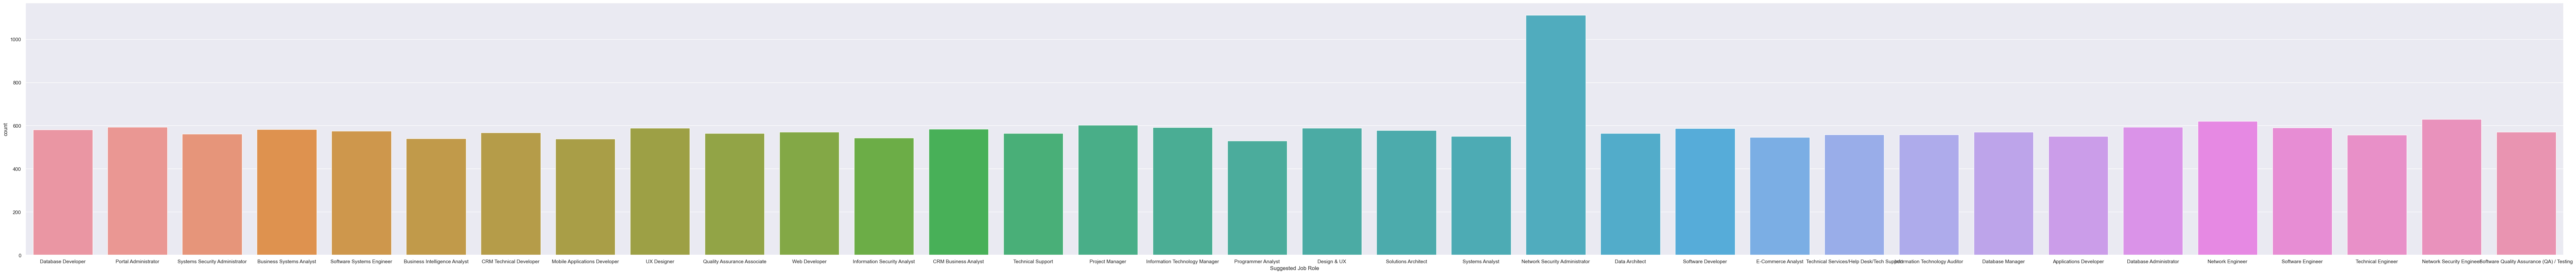

In [8]:
sns.set(rc={'figure.figsize':(100,10)})
sns.countplot(x = df["Suggested Job Role"])

<AxesSubplot:>

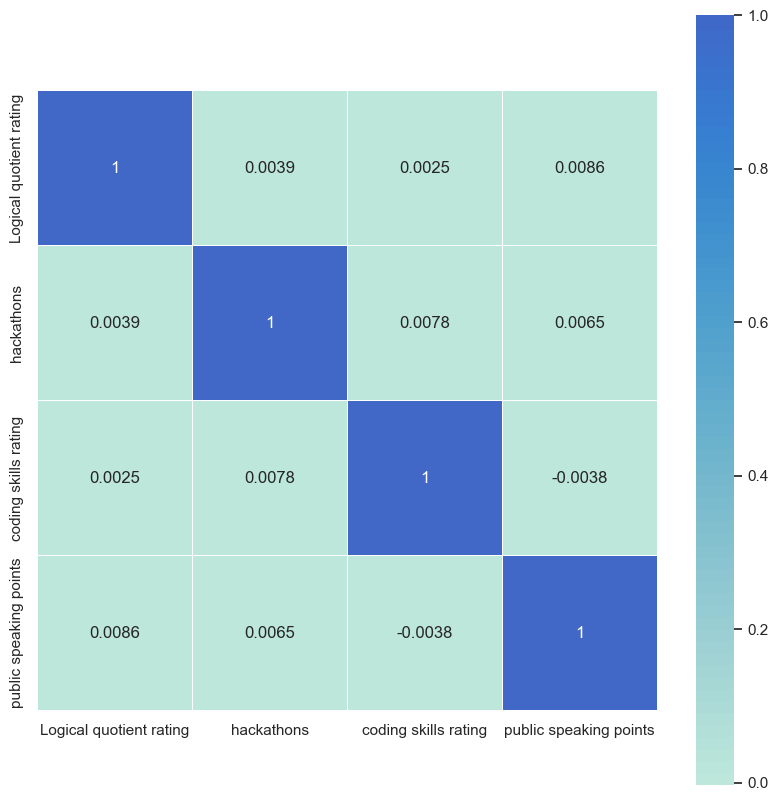

In [9]:
corr = df[['Logical quotient rating', 'hackathons', 
           'coding skills rating', 'public speaking points']].corr()
f,axes = plt.subplots(1,1,figsize = (10,10))
sns.heatmap(corr,square=True,annot = True,linewidth = .4,center = 2,ax = axes)

In [10]:
print(df["Interested subjects"].value_counts())

networks                 2096
IOT                      2037
data engineering         2025
Computer Architecture    2010
hacking                  2008
programming              2007
cloud computing          1993
Software Engineering     1949
Management               1938
parallel computing       1937
Name: Interested subjects, dtype: int64


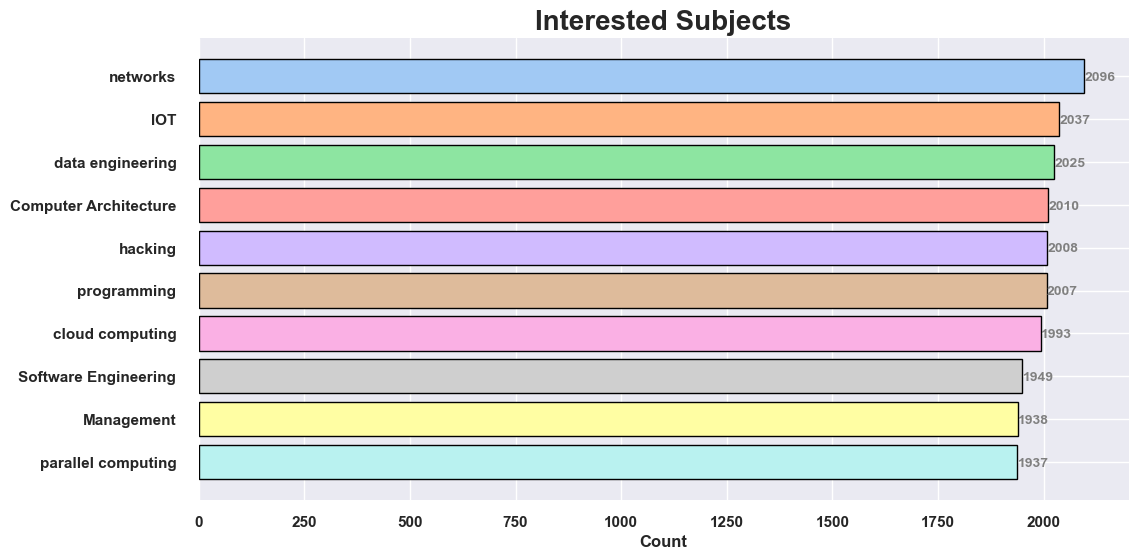

In [11]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df["Interested subjects"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))

# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


ax.invert_yaxis()


ax.set_title('Interested Subjects',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')


plt.show()

In [12]:
print(df["Interested Type of Books"].value_counts())

Guide                    1172
Health                   1165
Self help                1151
Horror                   1133
Autobiographies           615
Fantasy                   613
Satire                    598
Biographies               589
Comics                    589
Poetry                    588
Encyclopedias             588
Prayer books              586
Anthology                 585
Science fiction           580
Art                       575
History                   572
Mystery                   569
Diaries                   566
Drama                     566
Childrens                 564
Travel                    563
Religion-Spirituality     562
Action and Adventure      557
Trilogy                   555
Dictionaries              554
Romance                   553
Science                   550
Series                    548
Cookbooks                 542
Journals                  535
Math                      517
Name: Interested Type of Books, dtype: int64


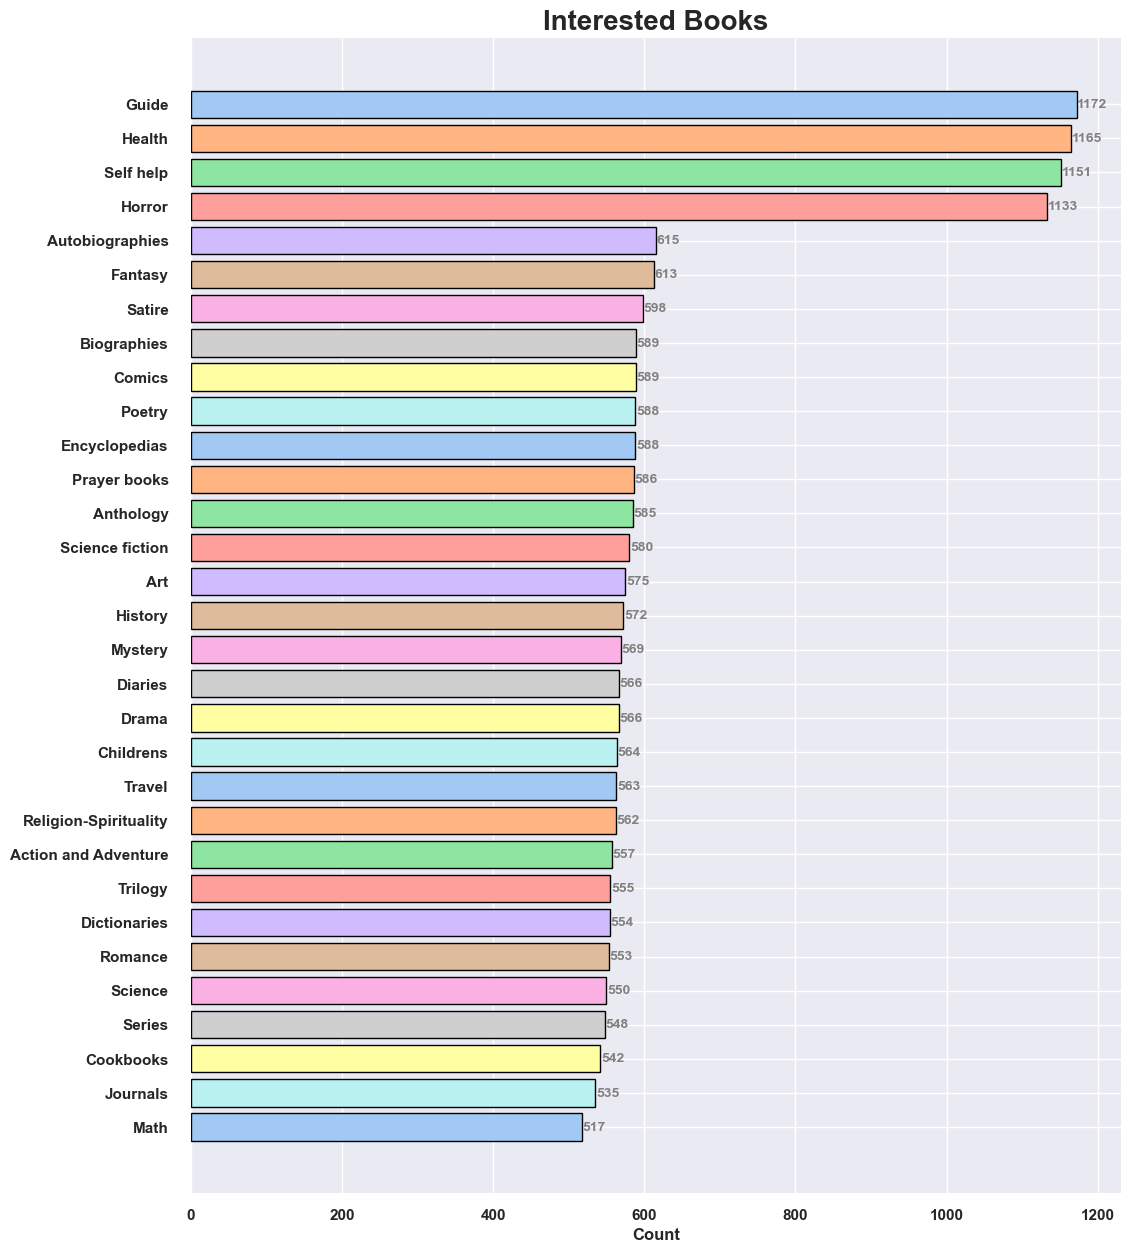

In [13]:

fig, ax = plt.subplots(figsize=(12,15))


title_cnt=df["Interested Type of Books"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))




for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)


ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


 
ax.invert_yaxis()


ax.set_title('Interested Books',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

plt.show()

In [14]:
print(df["certifications"].value_counts())

r programming           2275
machine learning        2255
shell programming       2252
information security    2250
full stack              2239
hadoop                  2210
python                  2198
app development         2165
distro making           2156
Name: certifications, dtype: int64


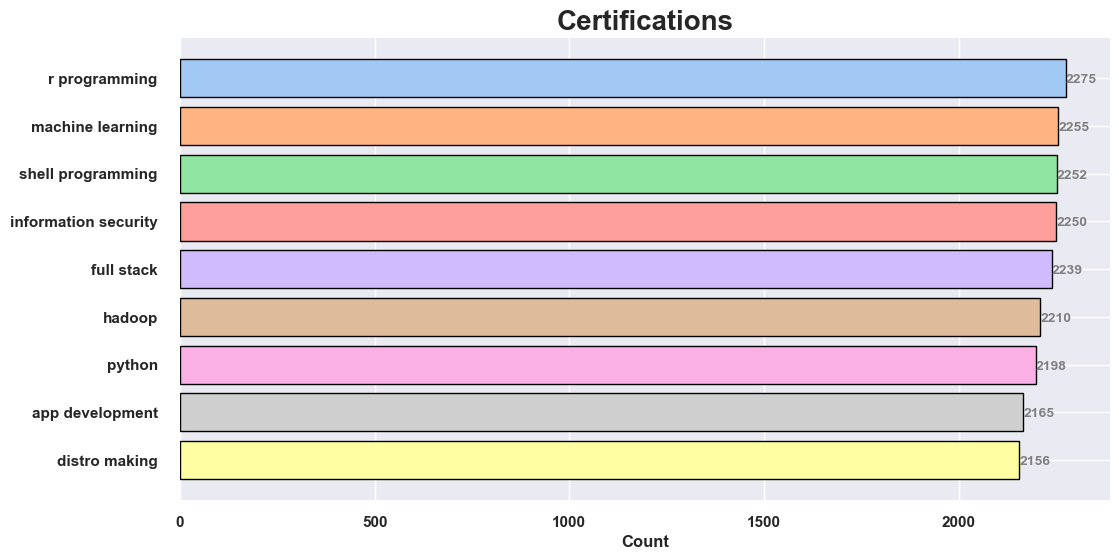

In [15]:

fig, ax = plt.subplots(figsize=(12,6))


title_cnt=df.certifications.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)


ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)



ax.invert_yaxis()


ax.set_title('Certifications',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

plt.show()

In [16]:
print(df["interested career area "].value_counts())

testing                     3354
system developer            3349
cloud computing             3343
security                    3328
Business process analyst    3321
developer                   3305
Name: interested career area , dtype: int64


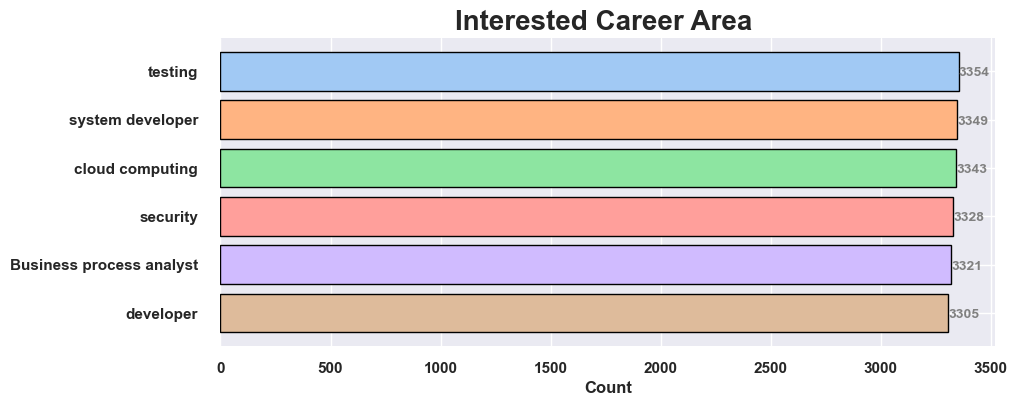

In [17]:

fig, ax = plt.subplots(figsize=(10,4)) 


title_cnt=df["interested career area "].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))




for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)


ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


ax.invert_yaxis()

ax.set_title('Interested Career Area ',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')


plt.show()

In [18]:
cols = df[["self-learning capability?", "Extra-courses did","Taken inputs from seniors or elders", "worked in teams ever?", "Introvert"]]
for i in cols:
    cleanup_nums = {i: {"yes": 1, "no": 0}}
    df = df.replace(cleanup_nums)

In [19]:
print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'Suggested Job Role']


In [20]:
mycol = df[["reading and writing skills", "memory capability score"]]
for i in mycol:
    cleanup_nums = {i: {"poor": 0, "medium": 1, "excellent": 2}}
    df = df.replace(cleanup_nums)

category_cols = df[['certifications', 'workshops', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 
                    'Interested Type of Books']]
for i in category_cols:
    df[i] = df[i].astype('category')
    df[i + "_code"] = df[i].cat.codes

print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['Management or Technical', 'hard/smart worker', 'Suggested Job Role']


In [21]:
print(df['Management or Technical'].unique())
print(df['hard/smart worker'].unique())

['Management' 'Technical']
['hard worker' 'smart worker']


In [22]:
df = pd.get_dummies(df, columns=["Management or Technical", "hard/smart worker"], prefix=["A", "B"])
df.head()

Logical quotient rating  hackathons  coding skills rating  \
0                        4           0                     4   
1                        7           1                     2   
2                        1           4                     1   
3                        1           1                     2   
4                        5           4                     6   

   public speaking points  self-learning capability?  Extra-courses did  \
0                       8                          1                  1   
1                       3                          0                  1   
2                       3                          0                  1   
3                       5                          1                  0   
4                       3                          0                  0   

      certifications          workshops  reading and writing skills  \
0  shell programming    cloud computing                           2   
1   machine learning  database security                           0   
2    app development   web technologies                           0   
3             python       data science                           1   
4    app development    cloud computing                           0   

   memory capability score  ... certifications_code workshops_code  \
0                        2  ...                   8              0   
1                        1  ...                   5              2   
2                        2  ...                   0              7   
3                        2  ...                   6              1   
4                        2  ...                   0              0   

  Interested subjects_code  interested career area _code  \
0                        4                             4   
1                        7                             0   
2                        6                             2   
3                        7                             5   
4                        0                             5   

  Type of company want to settle in?_code  Interested Type of Books_code  \
0                                       8                             21   
1                                       4                              5   
2                                       5                             29   
3                                       7                             23   
4                                       9                              7   

   A_Management A_Technical  B_hard worker  B_smart worker  
0             1           0              1               0  
1             0           1              1               0  
2             1           0              1               0  
3             1           0              0               1  
4             1           0              1               0  

[5 rows x 28 columns]

In [23]:
print("List of Numerical features: \n" , df.select_dtypes(include=np.number).columns.tolist())

List of Numerical features: 
 ['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'self-learning capability?', 'Extra-courses did', 'reading and writing skills', 'memory capability score', 'Taken inputs from seniors or elders', 'worked in teams ever?', 'Introvert', 'certifications_code', 'workshops_code', 'Interested subjects_code', 'interested career area _code', 'Type of company want to settle in?_code', 'Interested Type of Books_code', 'A_Management', 'A_Technical', 'B_hard worker', 'B_smart worker']


In [24]:
feed = df[['Logical quotient rating', 'coding skills rating', 'hackathons', 'public speaking points', 'self-learning capability?','Extra-courses did', 
           'Taken inputs from seniors or elders', 'worked in teams ever?', 'Introvert', 'reading and writing skills', 'memory capability score',  
           'B_hard worker', 'B_smart worker', 'A_Management', 'A_Technical', 'Interested subjects_code', 'Interested Type of Books_code', 'certifications_code', 
           'workshops_code', 'Type of company want to settle in?_code',  'interested career area _code',
             'Suggested Job Role']]





ac=[]





df_train_x = feed.drop('Suggested Job Role',axis = 1)

df_train_y = feed['Suggested Job Role']

f=preprocessing()
t=f.LabelEncoder()
t=f.fit_transform(df_train_y)


x_train, x_test, y_train, y_test = train_test_split(df_train_x,t , test_size=0.70, random_state=42)


In [25]:
dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
accuracy = accuracy_score(y_test,y_pred,sample_weight=0.2)
print("accuracy=",accuracy*100)
ac.append(accuracy*100)

accuracy= 54.601


In [26]:
svm = svm.SVC()
svm.fit(x_train, y_train)
svm_y_pred = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test,svm_y_pred,sample_weight=1)
print("accuracy=",svm_accuracy*100)
ac.append(svm_accuracy*100)

accuracy= 61.7


In [27]:
rf = RandomForestClassifier(random_state = 10)
rf.fit(x_train, y_train)
rfc_y_pred = rf.predict(x_test)
rfc_accuracy = accuracy_score(y_test,rfc_y_pred)
print("accuracy=",rfc_accuracy*100)
ac.append(rfc_accuracy*100)

accuracy= 71.33


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

xgb = XGBClassifier(random_state=42, learning_rate=0.02, n_estimators=300)
xgb.fit(x_train, y_train_encoded)
xgb_y_pred = xgb.predict(x_test)
xgb_accuracy = accuracy_score(y_test_encoded, xgb_y_pred,sample_weight=0.4)
print("accuracy=", xgb_accuracy*100)
ac.append(xgb_accuracy*100)

accuracy= 64.88000000000001


C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Agorithms  accuracy
0  Decision Tree    54.601
1            SVM    61.700
2  Random Forest    71.330
3            XGB    64.880

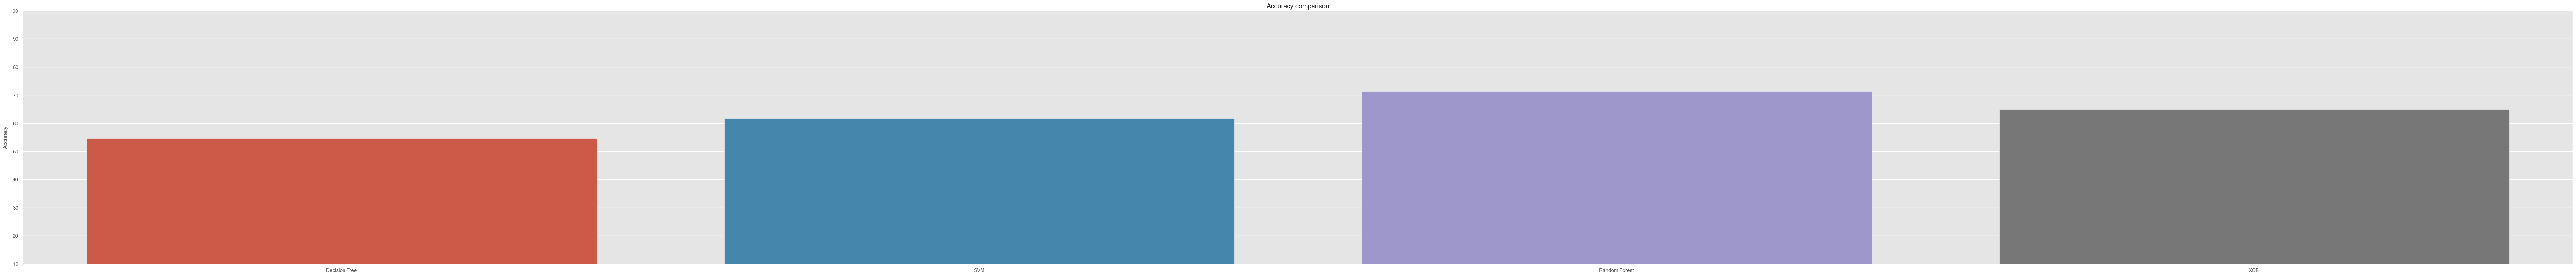

In [29]:
import numpy as np
import seaborn as sns
import matplotlib as plt

plt.style.use('ggplot')
x=['Decision Tree','SVM','Random Forest','XGB']
 
ax=sns.barplot(x,ac)
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')

ax.set_ylim(10,100)
import pandas as pd
data={'Agorithms':x,
     "accuracy":ac}
df=pd.DataFrame(data)
df.head()

In [30]:
import pickle 
pickle.dump(rf,open('model.pkl','wb'))